[*********************100%***********************]  1 of 1 completed


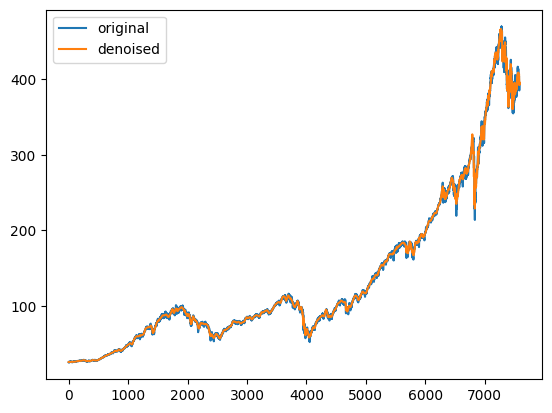

check the example.png created by this file


In [9]:
from make_data import make_data 
from DWT import discrete_wavelet_denoise, log_return 
from CWT import CWT
import numpy as np 
import os
from tqdm import tqdm

In [10]:
import yfinance as yf
SP500 = yf.download('SPY', keepna = True )

[*********************100%***********************]  1 of 1 completed


In [11]:
data = make_data (SP500)
signal = data['Adj Close'].to_numpy()

In [12]:


def generate_image(sample ,path, level_discrete_wavelet_transform,discrete_wavelet = 'db4',continuous_wavelet = 'cmor', **kwargs ) : 
    """
    generates an image from a portion of the signal
    
    Parameters 
    ----------
    sample : array
        the portion of the signal to be analyzed
    path : string
        path to save the image
    
    level_discrete_wavelet_transform :int
        level of discrete wavelet transform
        
    discrete_wavelet : string
        Type of the DWT (adapted to the package pywt)
    
    continous_wavelet : string
        Type of the CWT (adapted to the package pywt)
        
    kwargs : dict
        Parameters of the continuous wavelet
        
    """
    denoised_sample = discrete_wavelet_denoise (sample , wavelet = discrete_wavelet, level = level_discrete_wavelet_transform)
    log_ret = log_return(denoised_sample)
    CWT (log_ret,wavelet = continuous_wavelet, show = False ,path = path, **kwargs  )



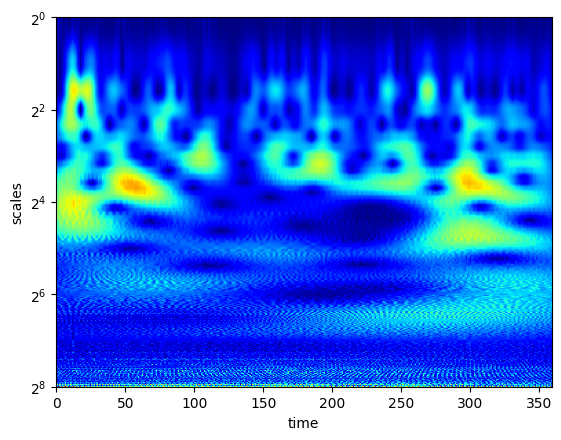

In [7]:
## Test 
window_size = 360
level_discrete_wavelet_transform = 1
sample = signal[:window_size]
kwargs = {'b' : 2., 'c' : 1. }
path = os.path.join('k', 'scalo')
generate_image(sample ,path, level_discrete_wavelet_transform,discrete_wavelet = 'db4',continuous_wavelet = 'cmor', **kwargs ) 

In [13]:
def generate_labels(signal, window_size, method ='mean' ):
    
    if (method == 'mean'):
        moving_average = np.convolve(signal, np.ones(window_size)/window_size, mode='valid')[:-1] ## exclude last sample cuz no label
        next_day = signal[window_size : ]
        labels = 1*(next_day>moving_average)
    
    return labels
        

In [53]:
def generate_NN_dataset(
    signal ,
    window_size,
    method_labels = 'mean',
    jump = 1,
    level_discrete_wavelet_transform = 2,
    discrete_wavelet = 'db4',
    continuous_wavelet = 'cmor', 
    **kwargs
    ) :
    
    """
    generates two folders of images according to the label
    
    Parameters 
    ----------
    signal : array
        the whole signal to be analyzed (one time series)
        
    window_size : int
        The length of the generate photo
        
    method_labels : string
        default : 'mean' 
        how to generate the labels : 'mean' means the labels are generated 
        as follows : ref the paper https://arxiv.org/pdf/2008.06042.pdf
    
    level_discrete_wavelet_transform :int
        level of discrete wavelet transform
        
    discrete_wavelet : string
        Type of the DWT (adapted to the package pywt)
    
    continous_wavelet : string
        Type of the CWT (adapted to the package pywt)
        
    kwargs : dict
        Parameters of the continuous wavelet
        
    
    Returns
    --------
    images in folders 0/ and 1/ according to the label of the image
    """
    print ('hi')
    # create folder per label
    os.makedirs(os.path.join(str(window_size),'0'), exist_ok=True)
    os.makedirs(os.path.join(str(window_size),'1'), exist_ok=True)
    
    #labels
    labels =  generate_labels(signal, window_size, method =method_labels )
    
    #create images
    for i in tqdm(range(0,signal.shape[0] - window_size + 1, jump)):
  
        sample = signal[i:i+window_size]
      
        path = os.path.join(str(window_size), os.path.join(str(labels[i]), str(i)))
        
        generate_image(
            sample ,
            path,
            level_discrete_wavelet_transform,
            discrete_wavelet,
            continuous_wavelet,
             **kwargs ) 

In [70]:
def f ():
    print ('ok')

In [74]:
import multiprocessing as mp 

procs = mp.cpu_count()

pool = mp.Pool()


for i in range(procs):
    pool.apply_async(f,())
        

In [75]:
n = signal.shape[0]
procs = mp.cpu_count()
pool = mp.Pool(procs)
args = ()
for i in range(procs):
        if (i == procs - 1):
            pool.apply_async(
                generate_NN_dataset,
                args = (
                signal[i*n//threads:] ,
                window_size,
                'mean',
                1,
                2,
                'db4',
                'cmor',
            ),
                kwds = kwargs
        )
                
        else:
            print('i')
            pool.apply_async(
                generate_NN_dataset,
                args = (
                signal[i*n//threads:(i+1)*n//threads] ,
                window_size,
                'mean',
                1,
                2,
                'db4',
                'cmor',
            ),
                kwds = kwargs
        )
        

i
i
i


In [32]:




if __name__ == '__main__':
    jobs = []
    n = signal.shape[0]
    procs = mp.cpu_count()
    
    

    for i in range(0, procs):
    
        out_list = list()
    with multiprocessing.Pool(PROCESSES) as po
        if (i == procs - 1):
            thread =multiprocessing.Process(
                target=generate_NN_dataset,
                args = (
                signal[i*n//threads:] ,
                window_size,
                'mean',
                1,
                2,
                'db4',
                'cmor',
                kwargs['b'],
                kwargs['c']
            )
                
            thread.daemon = True 
            thread.start()
        )
                
        else:
            print('i')
            thread = multiprocessing.Process(
           
                target=generate_NN_dataset,
                args = (
                signal[i*n//threads:(i+1)*n//threads] ,
                window_size,
                'mean',
                1,
                2,
                'db4',
                'cmor',
                kwargs['b'],
                kwargs['c']
            )
            thread.daemon = True 
            thread.start()

        )
        
        jobs.append(thread)

#     # Start the threads (i.e. calculate the random number lists)
#     for j in jobs:
#         print('start')
#         j.start()

    # Ensure all of the threads have finished
# for j in jobs:
#     j.join()

# print "List processing complete."

i
start
start


In [44]:
!python pipeline.py

Figure(640x480)
check the example.png created by this file
ok
i


In [28]:
window_size = 360
level_discrete_wavelet_transform = 1
kwargs = {'b' : 2., 'c' : 1. }
# generate_NN_dataset(signal , window_size,method_labels = 'mean',level_discrete_wavelet_transform = 2,discrete_wavelet = 'db4',continuous_wavelet = 'cmor', **kwargs )